In [1]:
# All the imports necessary to run the code
import pandas as pd
import json
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Get the JSON data from the API
url = 'https://gutendex.com/books'

try:
    response = requests.get(url)
    data = response.json()
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)    

{'count': 71982, 'next': 'https://gutendex.com/books/?page=2', 'previous': None, 'results': [{'id': 84, 'title': 'Frankenstein; Or, The Modern Prometheus', 'authors': [{'name': 'Shelley, Mary Wollstonecraft', 'birth_year': 1797, 'death_year': 1851}], 'translators': [], 'subjects': ["Frankenstein's monster (Fictitious character) -- Fiction", 'Frankenstein, Victor (Fictitious character) -- Fiction', 'Gothic fiction', 'Horror tales', 'Monsters -- Fiction', 'Science fiction', 'Scientists -- Fiction'], 'bookshelves': ['Gothic Fiction', 'Movie Books', 'Precursors of Science Fiction', 'Science Fiction by Women'], 'languages': ['en'], 'copyright': False, 'media_type': 'Text', 'formats': {'text/plain': 'https://www.gutenberg.org/ebooks/84.txt.utf-8', 'application/octet-stream': 'https://www.gutenberg.org/files/84/84-0.zip', 'text/plain; charset=us-ascii': 'https://www.gutenberg.org/files/84/84-0.txt', 'application/x-mobipocket-ebook': 'https://www.gutenberg.org/ebooks/84.kf8.images', 'applicati

In [3]:
pd.json_normalize(data['results'])

,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,download_count,...,formats.text/plain; charset=us-ascii,formats.application/x-mobipocket-ebook,formats.application/epub+zip,formats.image/jpeg,formats.text/html,formats.application/rdf+xml,formats.text/plain; charset=utf-8,formats.text/html; charset=iso-8859-1,formats.text/html; charset=utf-8,formats.text/html; charset=us-ascii
0,84,"Frankenstein; Or, The Modern Prometheus","[{'name': 'Shelley, Mary Wollstonecraft', 'bir...",[],[Frankenstein's monster (Fictitious character)...,"[Gothic Fiction, Movie Books, Precursors of Sc...",[en],False,Text,84070,...,https://www.gutenberg.org/files/84/84-0.txt,https://www.gutenberg.org/ebooks/84.kf8.images,https://www.gutenberg.org/ebooks/84.epub3.images,https://www.gutenberg.org/cache/epub/84/pg84.c...,https://www.gutenberg.org/ebooks/84.html.images,https://www.gutenberg.org/ebooks/84.rdf,NaN,NaN,NaN,NaN
1,1513,Romeo and Juliet,"[{'name': 'Shakespeare, William', 'birth_year'...",[],"[Conflict of generations -- Drama, Juliet (Fic...",[],[en],False,Text,60644,...,https://www.gutenberg.org/files/1513/1513-0.txt,https://www.gutenberg.org/ebooks/1513.kf8.images,https://www.gutenberg.org/ebooks/1513.epub3.im...,https://www.gutenberg.org/cache/epub/1513/pg15...,https://www.gutenberg.org/ebooks/1513.html.images,https://www.gutenberg.org/ebooks/1513.rdf,NaN,NaN,NaN,NaN
2,1342,Pride and Prejudice,"[{'name': 'Austen, Jane', 'birth_year': 1775, ...",[],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Harvard Classics]",[en],False,Text,53375,...,https://www.gutenberg.org/files/1342/1342-0.txt,https://www.gutenberg.org/ebooks/1342.kf8.images,https://www.gutenberg.org/ebooks/1342.epub3.im...,https://www.gutenberg.org/cache/epub/1342/pg13...,https://www.gutenberg.org/ebooks/1342.html.images,https://www.gutenberg.org/ebooks/1342.rdf,NaN,NaN,NaN,NaN
3,25344,The Scarlet Letter,"[{'name': 'Hawthorne, Nathaniel', 'birth_year'...",[],"[Adultery -- Fiction, Boston (Mass.) -- Histor...",[Banned Books from Anne Haight's list],[en],False,Text,34410,...,https://www.gutenberg.org/files/25344/25344-0.txt,https://www.gutenberg.org/ebooks/25344.kf8.images,https://www.gutenberg.org/ebooks/25344.epub3.i...,https://www.gutenberg.org/cache/epub/25344/pg2...,https://www.gutenberg.org/ebooks/25344.html.im...,https://www.gutenberg.org/ebooks/25344.rdf,NaN,NaN,NaN,NaN
4,11,Alice's Adventures in Wonderland,"[{'name': 'Carroll, Lewis', 'birth_year': 1832...",[],[Alice (Fictitious character from Carroll) -- ...,[Children's Literature],[en],False,Text,30353,...,https://www.gutenberg.org/files/11/11-0.txt,https://www.gutenberg.org/ebooks/11.kf8.images,https://www.gutenberg.org/ebooks/11.epub3.images,https://www.gutenberg.org/cache/epub/11/pg11.c...,https://www.gutenberg.org/ebooks/11.html.images,https://www.gutenberg.org/ebooks/11.rdf,NaN,NaN,NaN,NaN
5,345,Dracula,"[{'name': 'Stoker, Bram', 'birth_year': 1847, ...",[],"[Dracula, Count (Fictitious character) -- Fict...","[Gothic Fiction, Horror, Movie Books, Mystery ...",[en],False,Text,29600,...,https://www.gutenberg.org/files/345/345-0.txt,https://www.gutenberg.org/ebooks/345.kf8.images,https://www.gutenberg.org/ebooks/345.epub3.images,https://www.gutenberg.org/cache/epub/345/pg345...,https://www.gutenberg.org/ebooks/345.html.images,https://www.gutenberg.org/ebooks/345.rdf,NaN,NaN,NaN,NaN
6,5200,Metamorphosis,"[{'name': 'Kafka, Franz', 'birth_year': 1883, ...","[{'name': 'Wyllie, David (Translator)', 'birth...","[Metamorphosis -- Fiction, Psychological fiction]",[Horror],[en],True,Text,25218,...,NaN,https://www.gutenberg.org/ebooks/5200.kf8.images,https://www.gutenberg.org/ebooks/5200.epub3.im...,https://www.gutenberg.org/cache/epub/5200/pg52...,https://www.gutenberg.org/ebooks/5200.html.images,https://www.gutenberg.org/ebooks/5200.rdf,https://www.gutenberg.org/files/5200/5200-0.txt,https://www.gutenberg.org/files/5200/5200-h/52...,NaN,NaN
7,174,The Picture of Dorian Gra

In [4]:
    # Extract from the JSON data the titles, subjects, bookshelves and download_count
    titles = [book['title'] for book in data['results']]
    subjects = [[subject for subject in book['subjects']] for book in data['results']]
    download_count = [book['download_count'] for book in data['results']]
    
    # Create the DataFrames
    titles_df = pd.DataFrame(titles, columns=['Title'])
    subjects_df = pd.DataFrame(subjects)
    download_count_df = pd.DataFrame(download_count)

In [5]:
print(titles_df)

                                                Title
0             Frankenstein; Or, The Modern Prometheus
1                                    Romeo and Juliet
2                                 Pride and Prejudice
3                                  The Scarlet Letter
4                    Alice's Adventures in Wonderland
5                                             Dracula
6                                       Metamorphosis
7                          The Picture of Dorian Gray
8                                    The Great Gatsby
9                             A Doll's House : a play
10                               The Yellow Wallpaper
11  A Modest Proposal: For preventing the children...
12  The Importance of Being Earnest: A Trivial Com...
13        The Strange Case of Dr. Jekyll and Mr. Hyde
14                               A Tale of Two Cities
15                        The Legend of Sleepy Hollow
16                  The Adventures of Sherlock Holmes
17                          

In [6]:
print(subjects_df)

                                                   0   \
0   Frankenstein's monster (Fictitious character) ...   
1                    Conflict of generations -- Drama   
2                                Courtship -- Fiction   
3                                 Adultery -- Fiction   
4   Alice (Fictitious character from Carroll) -- J...   
5    Dracula, Count (Fictitious character) -- Fiction   
6                            Metamorphosis -- Fiction   
7                  Appearance (Philosophy) -- Fiction   
8                              First loves -- Fiction   
9                    Man-woman relationships -- Drama   
10                                   Feminist fiction   
11  Ireland -- Politics and government -- 18th cen...   
12                                           Comedies   
13                                       Horror tales   
14              British -- France -- Paris -- Fiction   
15                                  Ghosts -- Fiction   
16             Detective and my

In [7]:
print(download_count_df)

        0
0   84070
1   60644
2   53375
3   34410
4   30353
5   29600
6   25218
7   24750
8   24469
9   23167
10  22258
11  20862
12  20033
13  19977
14  18591
15  17905
16  17166
17  16921
18  16296
19  16160
20  15594
21  15579
22  14956
23  14882
24  14667
25  13852
26  13140
27  13109
28  12934
29  12146
30  12128
31  11395


In [8]:
# Create a dictionary that has the book's title associated with its download_count
dict = {'Title': titles, 'Download_Count': download_count}
titles_download_df = pd.DataFrame(dict)

print(titles_download_df)

                                                Title  Download_Count
0             Frankenstein; Or, The Modern Prometheus           84070
1                                    Romeo and Juliet           60644
2                                 Pride and Prejudice           53375
3                                  The Scarlet Letter           34410
4                    Alice's Adventures in Wonderland           30353
5                                             Dracula           29600
6                                       Metamorphosis           25218
7                          The Picture of Dorian Gray           24750
8                                    The Great Gatsby           24469
9                             A Doll's House : a play           23167
10                               The Yellow Wallpaper           22258
11  A Modest Proposal: For preventing the children...           20862
12  The Importance of Being Earnest: A Trivial Com...           20033
13        The Strang

In [9]:
# Create a DataFrame that has the book's author associated with its book's title
authors = [book['authors'][0]['name'] for book in data['results']]
titles_authors_df = pd.DataFrame({'Title': titles, 'Author': authors})

print(titles_authors_df)

                                                Title  \
0             Frankenstein; Or, The Modern Prometheus   
1                                    Romeo and Juliet   
2                                 Pride and Prejudice   
3                                  The Scarlet Letter   
4                    Alice's Adventures in Wonderland   
5                                             Dracula   
6                                       Metamorphosis   
7                          The Picture of Dorian Gray   
8                                    The Great Gatsby   
9                             A Doll's House : a play   
10                               The Yellow Wallpaper   
11  A Modest Proposal: For preventing the children...   
12  The Importance of Being Earnest: A Trivial Com...   
13        The Strange Case of Dr. Jekyll and Mr. Hyde   
14                               A Tale of Two Cities   
15                        The Legend of Sleepy Hollow   
16                  The Adventu

C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


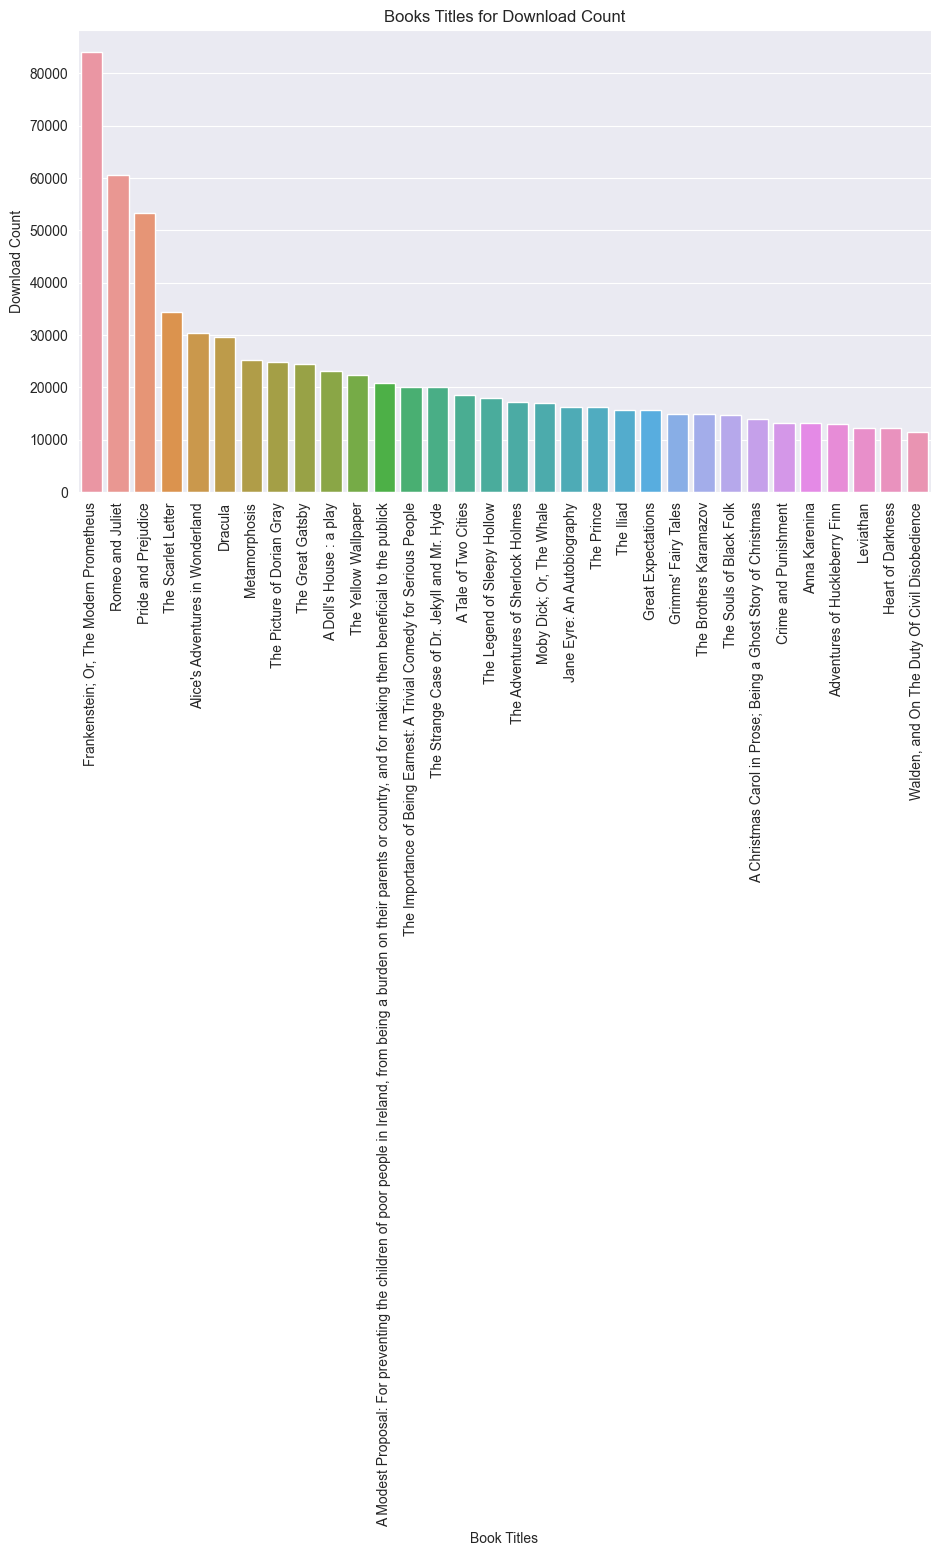

In [36]:
# Graphic about Title x Download_count 
plt.figure(figsize=(11, 6))
sns.barplot(data=titles_download_df, x='Title', y='Download_Count')
plt.xticks(rotation=90)
plt.title('Books Titles for Download Count')
plt.xlabel('Book Titles')
plt.ylabel('Download Count')
plt.show()

C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


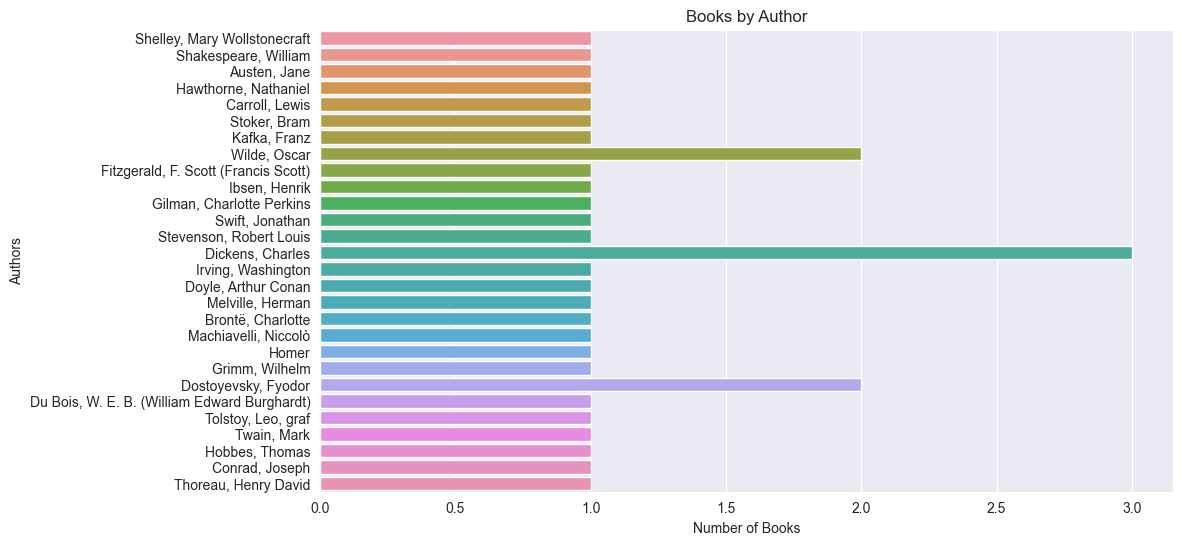

In [37]:
# Plotting authors and their books
plt.figure(figsize=(11, 6))
sns.countplot(data=titles_authors_df, y='Author')
plt.title('Books by Author')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.show()